In [1]:
using Knet, Sloth, Images, FileIO, RAM
include(Knet.dir("data", "mnist.jl"))

┌ Info: Recompiling stale cache file /home/ec2-user/.julia/compiled/v1.1/RAM/4LmYP.ji for RAM [bf214bdc-85f4-11e9-1ca3-895e27ce660b]
└ @ Base loading.jl:1184


In [2]:
atype = RAM.atype
dtrn, dtst = mnistdata(;xtype=atype, batchsize=1);

┌ Info: Loading MNIST...
└ @ Main /home/ec2-user/.julia/packages/Knet/HwZrA/data/mnist.jl:33


In [3]:
Knet.@load "/home/ec2-user/dev/RAM/checkpoints/cudnn-lstm-seed-2-best.jld2"
history[end][end] # tstacc

0.8610777243589743

In [4]:
x,y = rand(dtst);

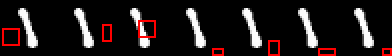

size(full) = (196, 28, 3)


error in running finalizer: Base.KeyError(key=524288)
error in running finalizer: Base.KeyError(key=524288)


10×2 Array{Float64,2}:
 1.0  90.48
 2.0   0.92
 3.0   0.22
 4.0   1.46
 5.0   3.3 
 6.0   1.47
 7.0   0.33
 8.0   0.29
 9.0   0.84
 0.0   0.68

In [5]:
scores, baseline, logπ, locations = ram(x)
probabilities = round.(100softmax(Array(scores)), digits=2)
img = RAM.unrolled_view(RAM.draw_glimpses(Array(x), locations)...)
display(img)
[[1:9..., 0] probabilities]